# Template

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

# Versuch 1

In [297]:
data = pd.read_csv('data/V1_Hochpass.csv', dtype=float, header=0)
freq, U_e, U_a, phi = data.to_numpy().T     # Hz, V, V, Grad
dU_e = U_e * 0.02
dU_a = U_a * 0.02
dphi = 0.5     # Grad
df = freq * 0.001

# ----------------------
# Theoretische Größen
# ----------------------
R1 = 2700       # Ohm
dR = R1*0.05
print(dR)
C = 100e-9      # F
dC = C*0.1

f_G = 1/(2*np.pi*R1*C)
df_G = f_G * (dC/C + dR/R1)
print(f_G/5, df_G/5)

w_hp = 2 * np.pi * freq
H_hp = 1j * w_hp * R1 * C / (1 + 1j * w_hp * R1 * C)

Q_theo = 20 * np.log10(np.abs(H_hp))         # theoretisches Verstärkungsmaß
phi_theo = np.angle(H_hp, deg=True)          # theoretische Phase

Q_mess = 20 * np.log10(U_a / U_e)
k = 20.0 / np.log(10.0)
dQ_mess = k * (dU_a / U_a + dU_e / U_e) 

135.0
117.89255043844098 17.683882565766147


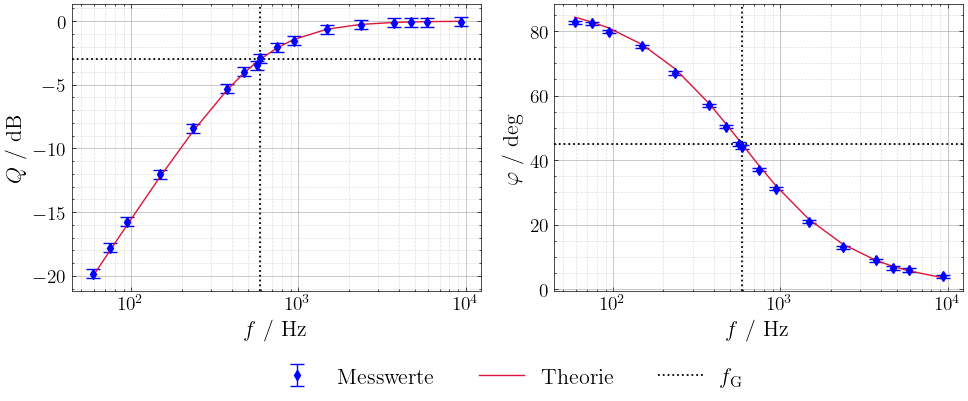

In [294]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Verstärkung (links) ---
ax.set_xscale("log")
ax.set_xlabel(r"$f$ / Hz", fontsize=16)
ax.set_ylabel(r"$Q$ / dB", fontsize=16)

ax.errorbar(freq, Q_mess, yerr=dQ_mess,  fmt="bd", label="Messwerte", markersize=5, capsize=5)
ax.set_xlim(min(freq)-15, max(freq)+3000)
ax.plot(freq, Q_theo, "-", label="Theorie", linewidth=1, color='crimson')

ax.axvline(f_G, color="black", linestyle=":", linewidth=1.3, label=r'$f_\text{G}$')
ax.axhline(-3, color="black", linestyle=":", linewidth=1.3)


ax.grid(True, ls="--", which="minor", alpha=0.4)
ax.grid(True, ls="-", which="major", alpha=1)

# --- Phase (rechts) ---
ax2.set_xscale("log")
ax2.set_xlabel(r"$f$ / Hz", fontsize=16)
ax2.set_ylabel(r"$\varphi$ / deg",fontsize=16)

ax2.errorbar(freq, phi, yerr=dphi, fmt="bd", label="Messwerte", markersize=5, capsize=5)
ax2.set_xlim(min(freq)-15, max(freq)+3000)
ax2.plot(freq, phi_theo, "-", label="Theorie", linewidth=1, color='crimson')

ax2.axvline(f_G, color="black", linestyle=":", linewidth=1.3)
ax2.axhline(45, color="black", linestyle=":", linewidth=1.3)

ax2.grid(True, ls="--", which="minor", alpha=0.4)
ax2.grid(True, ls="-", which="major", alpha=1)

lines_1, labels_1 = ax.get_legend_handles_labels()
plot_lines = [lines_1[2], lines_1[0], lines_1[1]]
plot_labels = [labels_1[2], labels_1[0], labels_1[1]]
# ax1.legend(lines_1, labels_1,loc="lower right", frameon=True, fontsize=16)
fig.legend(
    plot_lines, plot_labels,
    loc="lower center",
    ncol=3,
    fontsize=16,
    bbox_to_anchor=(0.525, -0.06)   # move the legend slightly below the subplots
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.23)  # make space for legend

# Versuch 2

In [272]:
data = pd.read_csv('data/V2_Tiefpass.csv', dtype=float, header=0)
freq, U_e, U_a, phi = data.to_numpy().T     # Hz, V, V, Grad
phi = np.where(phi > 180, phi-360, phi)
dU_e = U_e * 0.02
dU_a = U_a * 0.02
dphi = 0.5     # Grad
df = freq * 0.001

# ----------------------
# Theoretische Größen
# ----------------------
R1 = 2700       # Ohm
dR = R1*0.05
C = 100e-9      # F
dC = C*0.1

f_G = 1/(2*np.pi*R1*C)
df_G = f_G * (dC/C + dR/R1)
print(f_G, df_G)

f_G = 1/(2*np.pi*R1*C)
w_lp = 2 * np.pi * freq
H_lp = 1/(1 + 1j*w_lp*R1*C)

Q_theo = 20 * np.log10(np.abs(H_lp))         # theoretisches Verstärkungsmaß
phi_theo = np.angle(H_lp, deg=True)          # theoretische Phase

Q_mess = 20 * np.log10(U_a / U_e)
k = 20.0 / np.log(10.0)
dQ_mess = k * (dU_a / U_a + dU_e / U_e) 

589.4627521922049 88.41941282883074


[<matplotlib.lines.Line2D object at 0x7fc9d29a42d0>, <matplotlib.lines.Line2D object at 0x7fc9d29a4410>, <ErrorbarContainer object of 3 artists>] ['Theorie', '$f_\\text{G}$', 'Messwerte']


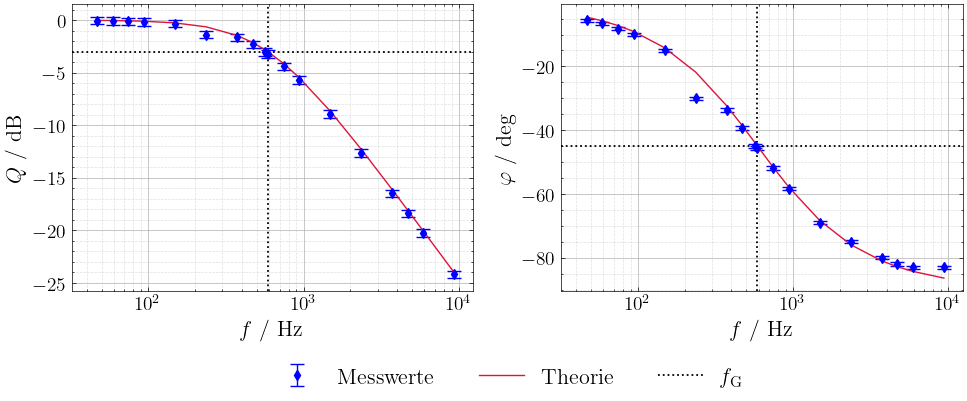

In [ ]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Verstärkung (links) ---
ax.set_xscale("log")
ax.set_xlabel(r"$f$ / Hz", fontsize=16)
ax.set_ylabel(r"$Q$ / dB", fontsize=16)

ax.errorbar(freq, Q_mess, yerr=dQ_mess,  fmt="bd", label="Messwerte", markersize=5, capsize=5)
ax.set_xlim(min(freq)-15, max(freq)+3000)
ax.plot(freq, Q_theo, "-", label="Theorie", linewidth=1, color='crimson')

ax.axvline(f_G, color="black", linestyle=":", linewidth=1.3, label=r'$f_\text{G}$')
ax.axhline(-3, color="black", linestyle=":", linewidth=1.3)


ax.grid(True, ls="--", which="minor", alpha=0.4)
ax.grid(True, ls="-", which="major", alpha=1)

# --- Phase (rechts) ---
ax2.set_xscale("log")
ax2.set_xlabel(r"$f$ / Hz", fontsize=16)
ax2.set_ylabel(r"$\varphi$ / deg",fontsize=16)

ax2.errorbar(freq, phi, yerr=dphi, fmt="bd", label="Messwerte", markersize=5, capsize=5)
ax2.set_xlim(min(freq)-15, max(freq)+3000)
ax2.plot(freq, phi_theo, "-", label="Theorie", linewidth=1, color='crimson')

ax2.axvline(f_G, color="black", linestyle=":", linewidth=1.3)
ax2.axhline(-45, color="black", linestyle=":", linewidth=1.3)

ax2.grid(True, ls="--", which="minor", alpha=0.4)
ax2.grid(True, ls="-", which="major", alpha=1)

lines_1, labels_1 = ax.get_legend_handles_labels()
plot_lines = [lines_1[2], lines_1[0], lines_1[1]]
plot_labels = [labels_1[2], labels_1[0], labels_1[1]]
# ax1.legend(lines_1, labels_1,loc="lower right", frameon=True, fontsize=16)
fig.legend(
    plot_lines, plot_labels,
    loc="lower center",
    ncol=3,
    fontsize=16,
    bbox_to_anchor=(0.525, -0.06)   # move the legend slightly below the subplots
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.23)  # make space for legend

# Versuch 3

In [13]:
# Messwerte
data = pd.read_csv('data/V3_RLC_par_Sprungantwort.csv', dtype=float, header=1, skiprows=0)
t, U_e, U_a = data.to_numpy().T
t *= 1000 #ms
dU_e = U_e * 0.02
dU_a = U_a * 0.02

#Verwendete Bauteile
R3 = 4.7e3     #Ohm
dR = R3 * 0.05
C = 100e-9     #F
dC = C * 0.1
L = 10e-3      #H
dL = L*0.1

# Resonanzfrequnz und Periodendauer Theoretisch
f_0 = 1/(2*np.pi*np.sqrt(L*C))
df_0 = f_0 * (dL/L + dC/C)

f_0mess = 4897
df0_mess = f_0mess * 0.001
print(f_0, df_0)
print(f_0mess, df0_mess)

# Messbereich aus daten Auswählen
indx = np.logical_and(t >= 0.1, t <=2) 

t = t[indx]
U_a = U_a[indx]
U_e = U_e[indx]
dU_e = dU_e[indx]
dU_a = dU_a[indx]

# Berechne Strom und Unsicherheit
I = (U_e - U_a) / R3
dI = (dU_e / R3) + (dU_a / R3) + (((U_e - U_a) * dR) / R3**2)

# convert to mA
I *= 1000
dI *= 1000

# Finde peaks
peaks, props = find_peaks(I, prominence=1e-3, distance=1)
peak_times = t[peaks]
peak_values = I[peaks]

# Berechne Periodendauer 
periods = np.diff(peak_times) 
mean_period = np.mean(periods)
std_period = np.std(periods) / np.sqrt(len(periods))


print(f"\nDetected {len(peaks)} peaks, giving {len(periods)} periods.")
print(rf"period = {mean_period:.4f} \pm {std_period:.4f} ms")
print(rf"Theorie: {1/f_0 * 1000:.2f} \pm {df_0/f_0**2 * 1000:.3f} ms")
print(rf"Theorie: {1/f_0mess * 1000:.4f} \pm {df0_mess/f_0mess**2 * 1000:.5f} ms")

5032.921210448703 1006.5842420897407
4897 4.897

Detected 9 peaks, giving 8 periods.
period = 0.2037 \pm 0.0017 ms
Theorie: 0.20 \pm 0.040 ms
Theorie: 0.2042 \pm 0.00020 ms


A_fit = 0.023186520062529206 ± 0.00010148579416832477
d_fit = 0.20829 ± 0.00011
lam_fit = 1.38645 ± 0.01620
delta_fit = 0.28249 ± 0.01001


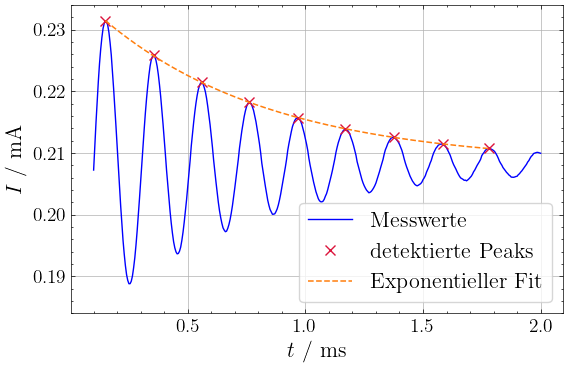

In [8]:
def exp_decay(t, A, lam, d):
    return A * np.exp(-lam * t) + d

t_peaks_shifted = peak_times - peak_times[0]

popt, pcov = curve_fit(exp_decay, t_peaks_shifted, peak_values)
A_fit, lam_fit, d_fit = popt
A_fit_err, lam_fit_err, d_fit_err = np.sqrt(np.diag(pcov))

print(f"A_fit = {A_fit} ± {A_fit_err}")
print(f"d_fit = {d_fit:.5f} ± {d_fit_err:.5f}")
print(f"lam_fit = {lam_fit:.5f} ± {lam_fit_err:.5f}")
print(f"delta_fit = {lam_fit*mean_period:.5f} ± {lam_fit_err*mean_period + lam_fit*std_period:.5f}")

# Plot
fig, ax = plt.subplots(figsize=(6, 4))

# Messwerte übersichtshalber ohne Unsicherheit!
ax.plot(t, I, "b-", label="Messwerte")

ax.plot(peak_times, peak_values, 'x', markersize=7, color='crimson',
        label='detektierte Peaks')

t_fit = np.linspace(peak_times[0], peak_times[-1], 500)
ax.plot(t_fit, exp_decay(t_fit - peak_times[0], *popt),
        '--', color='tab:orange', label="Exponentieller Fit", linewidth=1.1)

ax.set_xlabel(r"$t$ / ms", fontsize=16)
ax.set_ylabel(r"$I$ / mA", fontsize=16)
ax.grid(True)
ax.legend(loc="lower right", fontsize=16, frameon=True)
ax.set_ylim(0.184, 0.234)
plt.tight_layout()
plt.show()

In [17]:
# Falsche Formel!
# single_deltas = np.log(peak_values[:-1] / peak_values[1:])

# korrekte Formel aufgrund verschiebung
single_deltas = np.log((peak_values[:-1] - d_fit) / (peak_values[1:]- d_fit))

delta = np.mean(single_deltas)
d_delta = np.std(single_deltas) / np.sqrt(len(single_deltas))

Q_mess = 0.5*np.sqrt(1+ (2*np.pi / delta)**2)
dQ_mess = 2*np.pi**2 * (d_delta/ delta**3) / Q_mess

err_delta_fit = lam_fit_err*mean_period + lam_fit*std_period
Q_mess_fit = 0.5*np.sqrt(1+ (2*np.pi / (lam_fit*mean_period))**2)
dQ_mess_fit = 2*np.pi**2 * (err_delta_fit / (lam_fit*mean_period)**3) / Q_mess_fit

Q_theo = R3 / np.sqrt(L / C)
dQ_theo = Q_theo*(dR/R3 + dL/(2*L) + dC/(2*C))

print(f"delta  = {delta:.3f} ± {d_delta:.4f}")
print(f"Q_mess = {Q_mess:.1f}  ± {dQ_mess:.1f}")
print(f"Q_mess_fit = {Q_mess_fit:.1f}  ± {dQ_mess_fit:.2f}")
print(f"Q_theo = {Q_theo:.1f}  ± {dQ_theo:.1f}")

delta  = 0.279 ± 0.0049
Q_mess = 11.3  ± 0.4
Q_mess_fit = 11.1  ± 0.45
Q_theo = 14.9  ± 2.2


# Versuch 4

In [268]:
data = pd.read_csv('data/V4_RLC_ser.csv', dtype=float, header=0)
freq, U_E, U_R, U_C, phi, U_L = data.to_numpy().T     # Hz, V, mV, V, Grad, mV
phi = np.where(phi > 180, phi-360, phi)
#convert to mV
U_E *= 1000 
U_C *= 1000

# Unsicherheiten
dU_E = U_E * 0.02
dU_R = U_R * 0.02
dU_C = U_C * 0.02
dU_L = U_L * 0.02
dphi = 0.5     # Grad
df = freq * 0.001

# ----------------------
# Theoretische Größen
# ----------------------
R2A = 15       # Ohm
dR = R2A * 0.05
C = 100e-9      # F
dC = C*0.1
L = 10e-3      #H
dL = L*0.1

f_0 = 1/(2*np.pi*np.sqrt(L*C))
df_0 = f_0 * (dL/L + dC/C)
k = 20.0 / np.log(10.0)

Q_R = 20 * np.log10(U_R / U_E)
dQ_R = k * (dU_R / U_R + dU_E / U_E) 
Q_C = 20 * np.log10(U_C / U_E)
dQ_C = k * (dU_C / U_C + dU_E / U_E) 
Q_L = 20 * np.log10(U_L / U_E)
dQ_L = k * (dU_L / U_L + dU_E / U_E) 

In [269]:
f_plot = np.linspace(min(freq), max(freq), 3000)
omega = 2*np.pi * f_plot

# Impedanzen
Z_R = R2A
Z_L = omega*L
Z_C = 1/(omega*C)
Z_tot = np.sqrt(R2A**2 + (Z_L - Z_C)**2)

dZ_R = dR
dZ_L = Z_L * dL / L
dZ_C = Z_C * dC / C
dZ_tot = np.sqrt((R2A/Z_tot*dZ_R)**2 + ((Z_L-Z_C)/Z_tot*np.sqrt(dZ_L**2 + dZ_C**2))**2)

# Unsicherheiten Impedanzen
dZ_R = dR
dZ_L = Z_L * dL / L
dZ_C = Z_C * dC / C

# Strom
U_E_plot = np.linspace(min(U_E), max(U_E), 3000) 
I_th = U_E_plot / Z_tot

# Spannungen über Bauteile
U_R_th = I_th * Z_R
U_L_th = I_th * Z_L
U_C_th = I_th * Z_C

def db(V_out, V_in):
    return 20*np.log10(V_out/V_in)

Q_R_th = db(U_R_th, U_E_plot)
Q_C_th = db(U_C_th, U_E_plot)
Q_L_th = db(U_L_th, U_E_plot)
phi_th = np.arctan((Z_L - Z_C)/R2A) * 180/np.pi

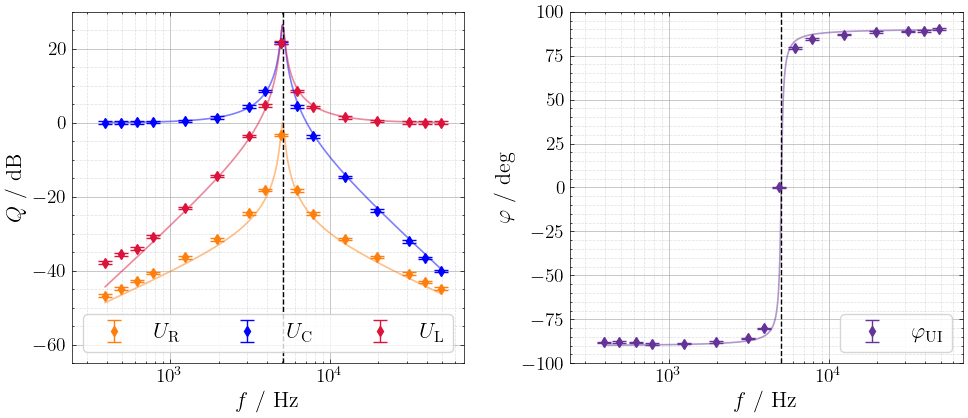

In [ ]:
# Bode Diagramm
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

# --- Verstärkung (links) ---
ax.set_xscale("log")
ax.set_xlabel(r"$f$ / Hz", fontsize=16)
ax.set_ylabel(r"$Q$ / dB", fontsize=16)

ax.errorbar(freq, Q_R, yerr=dQ_R, color='tab:orange', fmt="d", label=r"$U_\text{R}$", markersize=5, capsize=5)
ax.errorbar(freq, Q_C, yerr=dQ_C, color='blue', fmt="d", label=r"$U_\text{C}$", markersize=5, capsize=5)
ax.errorbar(freq, Q_L, yerr=dQ_L, color='crimson', fmt="d", label=r"$U_\text{L}$", markersize=5, capsize=5)

ax.plot(f_plot, Q_R_th, color='tab:orange', linestyle='-', linewidth=1.2, alpha=0.5)
ax.plot(f_plot, Q_C_th, color='blue', linestyle='-', linewidth=1.2, alpha=0.5)
ax.plot(f_plot, Q_L_th, color='crimson', linestyle='-', linewidth=1.2, alpha=0.5)

ax.axvline(f_0, color="black", linestyle="--", linewidth=1)
# ax.axhline(-3, color="black", linestyle=":", linewidth=1.3)

ax.set_xlim(min(freq)-150, max(freq)+20000)
ax.set_ylim(-65, 30)
ax.grid(True, ls="--", which="minor", alpha=0.4)
ax.grid(True, ls="-", which="major", alpha=1)

# --- Phase (rechts) ---
ax2.set_xscale("log")
ax2.set_xlabel(r"$f$ / Hz", fontsize=16)
ax2.set_ylabel(r"$\varphi$ / deg",fontsize=16)

ax2.errorbar(freq, phi, yerr=dphi, fmt="d", color="rebeccapurple", label=r"$\varphi_\text{UI}$", markersize=5, capsize=5)
ax2.plot(f_plot, phi_th, '-', color="rebeccapurple", alpha=0.5, linewidth=1.2)

ax2.axvline(f_0, color="black", linestyle="--", linewidth=1)
ax2.set_xlim(min(freq)-150, max(freq)+20000)

ax2.set_ylim(-100, 100)
ax2.grid(True, ls="--", which="minor", alpha=0.4)
ax2.grid(True, ls="-", which="major", alpha=1)

ax.legend(frameon=True, fontsize=16, ncols=3, loc='lower center')
ax2.legend(frameon=True, fontsize=16, loc='lower right')

plt.tight_layout()

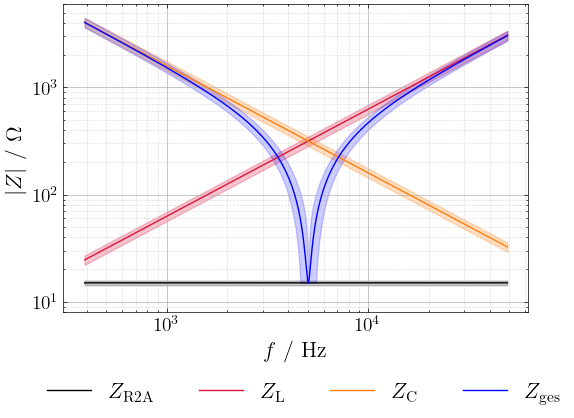

In [ ]:
# Verlauf der Impedanzen
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(f_plot, Z_R*np.ones_like(f_plot), 'k-', label=r"$Z_\text{R2A}$")
ax.fill_between(f_plot, Z_R*np.ones_like(f_plot)-dZ_R, Z_R*np.ones_like(f_plot)+dZ_R, color='k', alpha=0.2)

ax.plot(f_plot, Z_L, color='crimson', label=r"$Z_\text{L}$")
ax.fill_between(f_plot, Z_L-dZ_L, Z_L+dZ_L, color='crimson', alpha=0.25)

ax.plot(f_plot, Z_C, color='tab:orange', label=r"$Z_\text{C}$")
ax.fill_between(f_plot, Z_C-dZ_C, Z_C+dZ_C, color='tab:orange', alpha=0.25)

ax.plot(f_plot, Z_tot, color='blue', label=r"$Z_\text{ges}$")
lower = np.maximum(Z_tot - dZ_tot, Z_R)
ax.fill_between(f_plot, lower, Z_tot+dZ_tot, color='b', alpha=0.2)
ax.set_xlabel(r"$f$ / Hz", fontsize=16)
ax.set_ylabel(r"$|Z|$ / $\Omega$", fontsize=16)
ax.set_ylim(8, 6000)
ax.grid(True, ls="--", which="minor", alpha=0.4)
ax.grid(True, ls="-", which="major", alpha=1)

lines_1, labels_1 = ax.get_legend_handles_labels()
# ax1.legend(lines_1, labels_1,loc="lower right", frameon=True, fontsize=16)
fig.legend(
    lines_1, labels_1,
    loc="lower center",
    ncol=4,
    fontsize=16,
    bbox_to_anchor=(0.525, -0.17)   # move the legend slightly below the subplots
)

In [249]:
# Güte des Schwingkreises
Q_th = (1/R2A) * np.sqrt(L/C)
dQ_th = Q_th * ((dL/(2*L))+ (dC/(2*C)) + (dR/R2A))

print(f"Güte theoretisch: Q = {Q_th:.1f} ± {dQ_th:.1f}")

Güte theoretisch: Q = 21.1 ± 3.2


## Versuch 4.2

In [25]:
R2B = 47       # Ohm
dR = R2B * 0.05
C = 100e-9      # F
dC = C*0.1
L = 10e-3      #H
dL = L*0.1

# Nur Qualitative Analyse unf Vergleich!
# Unsicherheit wird nicht angegeben, da relativ groß
f0 = 1/(2*np.pi*np.sqrt(L*C))
print(f'f_0 = {f0:.2f} ')

fC = f_0 * np.sqrt(1 - R2B**2 * C / (2*L))
fL = f_0 * np.sqrt((1+ np.sqrt(1+(2*R2B**2 * C/L)))/2)
print(f'f_C = {fC:.2f}')
print(f'f_L = {fL:.2f}')

f0_mess = 4897
df0_mess = f_0mess * 0.01
fC_mess = 4776 
dfC_mess = fC_mess * 0.01
fL_mess = 5064
dfL_mess = fL_mess * 0.01
print(f'f_0_mess = {f0_mess} pm {df0_mess:.0f}')
print(f'f_C_mess = {fC_mess} pm {dfC_mess:.0f}')
print(f'f_L_mess = {fL_mess} pm {dfL_mess+1:.0f}')

f_0 = 5032.92 
f_C = 5005.05
f_L = 5060.34
f_0_mess = 4897 pm 49
f_C_mess = 4776 pm 48
f_L_mess = 5064 pm 52
